## Clustering

The goal of this code is to perform customer segmentation based on their Age, Annual Income, and Spending Score. By applying clustering algorithms, we want to group customers into different segments or clusters based on their similarities in these features. This will help in understanding customer behavior, allowing businesses to target different segments with tailored strategies.

We use three different clustering algorithms (KMeans, DBSCAN, and Hierarchical Clustering) because different algorithms perform well under different conditions. By using multiple algorithms, we can compare results and pick the one that best captures the natural clusters in the data.

In [1]:
from google.colab import files
import pandas as pd
import warnings
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
mall_df = pd.read_csv(filename)

In [4]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Visualizing the Data

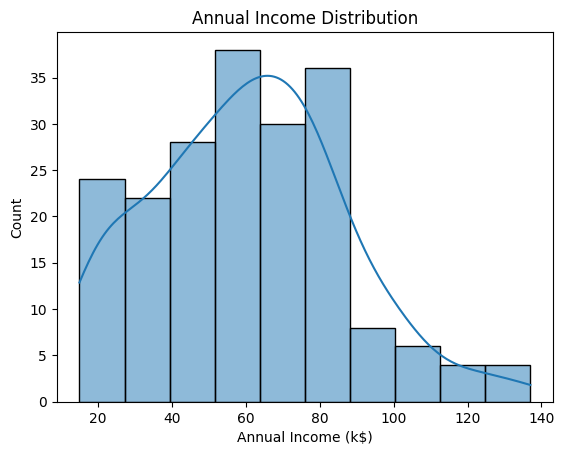

In [7]:
sns.histplot(mall_df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

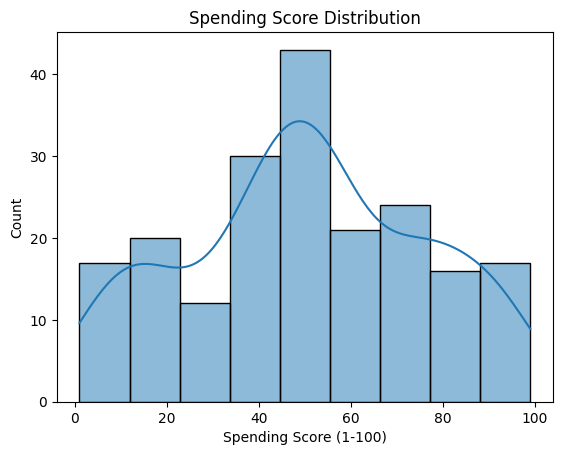

In [8]:
sns.histplot(mall_df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()

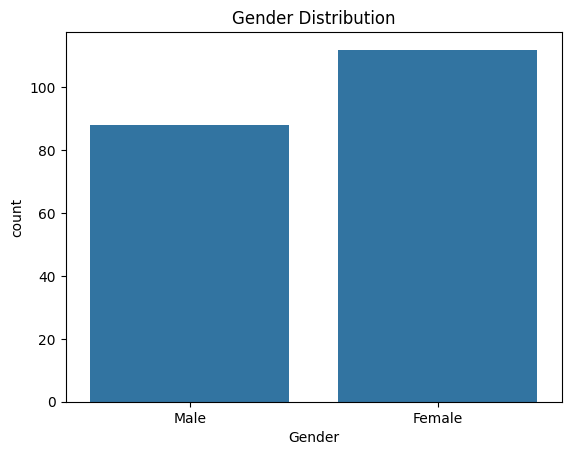

In [9]:
sns.countplot(data=mall_df, x='Gender')
plt.title('Gender Distribution')
plt.show()

In [10]:
X = mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

### Fit KMeans

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
mall_df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

In [13]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
mall_df['PCA1'], mall_df['PCA2'] = pca_data[:, 0], pca_data[:, 1]

In [14]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,PCA1,PCA2
0,1,Male,19,15,39,2,-0.615720,-1.763481
1,2,Male,21,15,81,2,-1.665793,-1.820747
2,3,Female,20,16,6,3,0.337862,-1.674799
3,4,Female,23,16,77,2,-1.456573,-1.772430
4,5,Female,31,17,40,2,-0.038465,-1.662740
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,-1.093705,2.215577
196,197,Female,45,126,28,4,0.800448,2.540748
197,198,Male,32,126,74,1,-1.119709,2.445169
198,199,Male,32,137,18,4,0.395411,2.946665


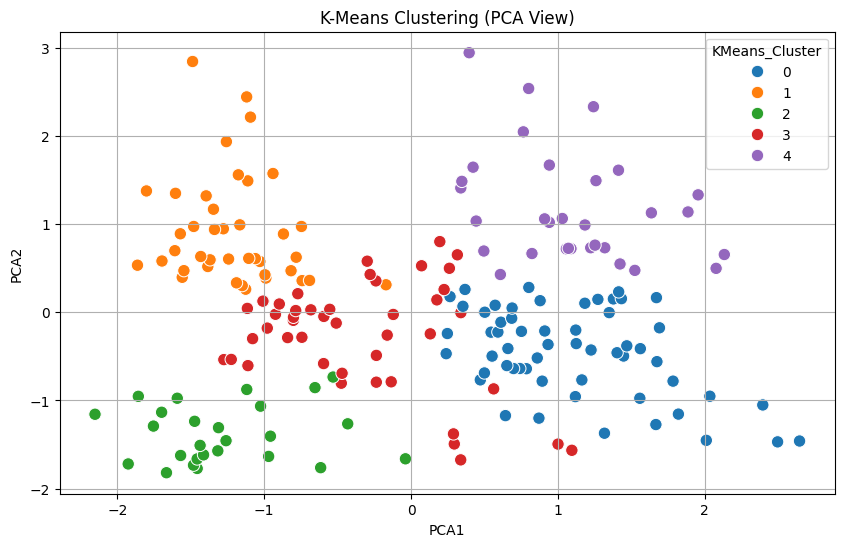

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10', s=80)
plt.title('K-Means Clustering (PCA View)')
plt.grid(True)
plt.show()

In [16]:
dbscan = DBSCAN(eps=0.6, min_samples=3)
mall_df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

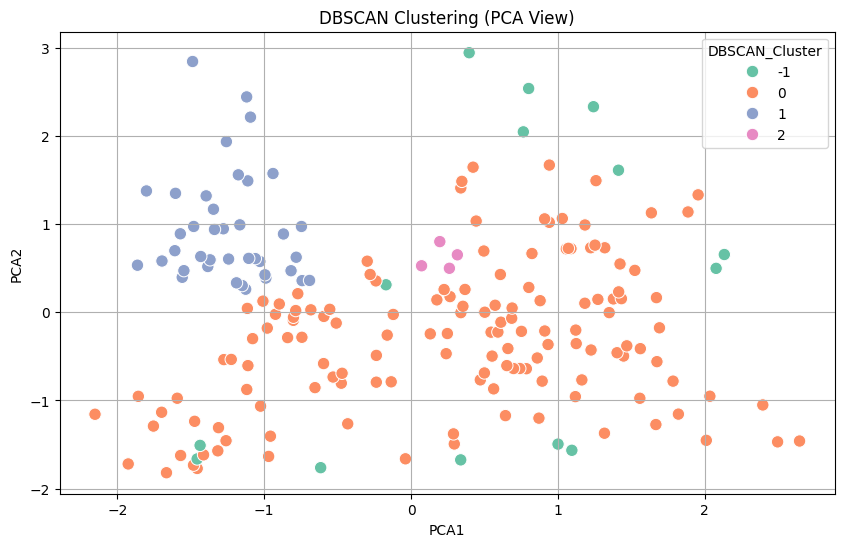

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set2', s=80)
plt.title('DBSCAN Clustering (PCA View)')
plt.grid(True)
plt.show()

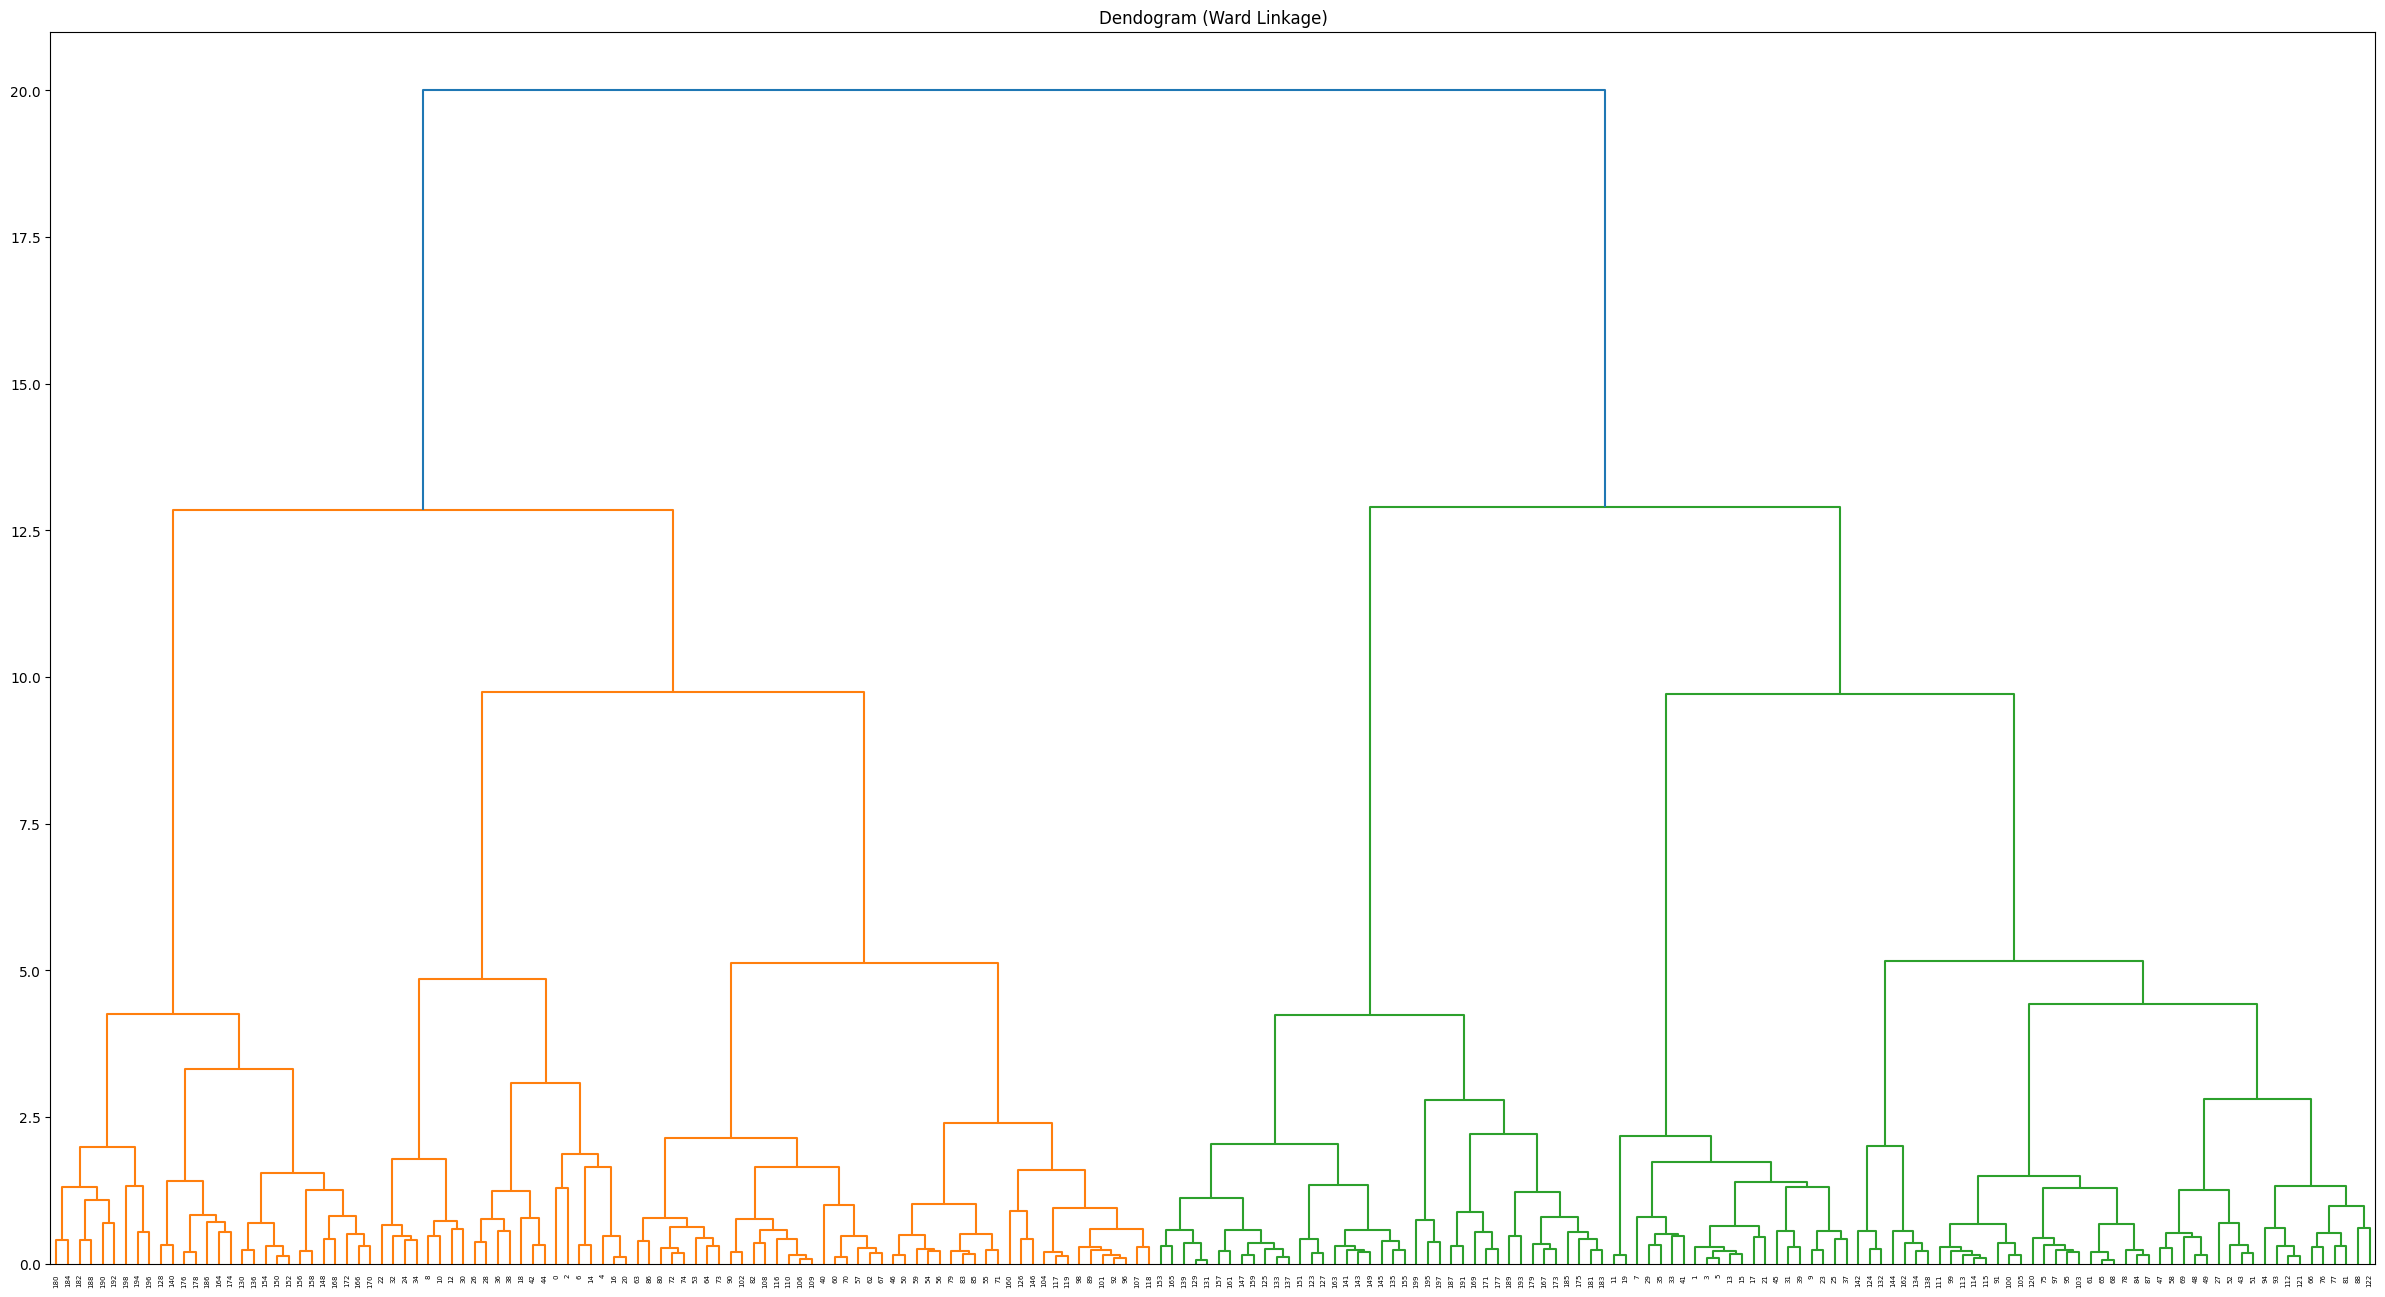

In [18]:
plt.figure(figsize=(30, 16))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendogram (Ward Linkage)')
plt.show()

In [19]:
hc = AgglomerativeClustering(n_clusters=5)
mall_df['HC_Cluster'] = hc.fit_predict(scaled_data)

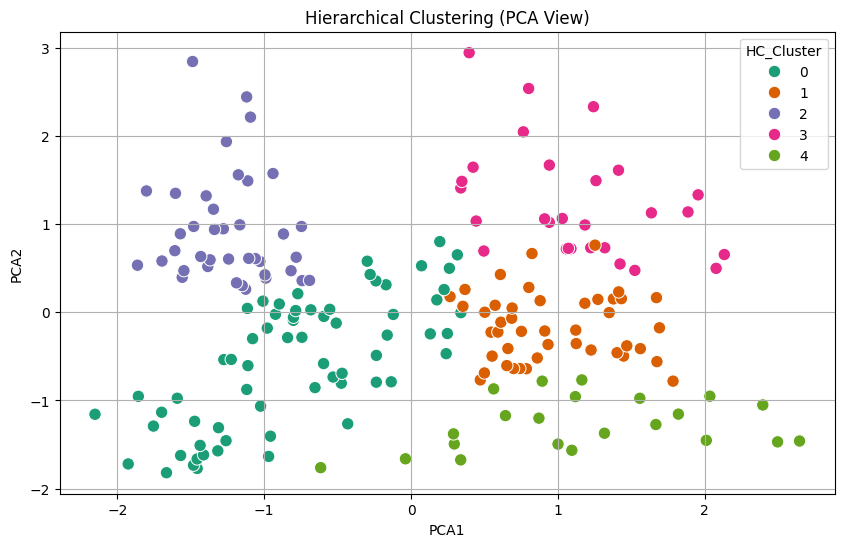

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_df, x='PCA1', y='PCA2', hue='HC_Cluster', palette='Dark2', s=80)
plt.title('Hierarchical Clustering (PCA View)')
plt.grid(True)
plt.show()

### Compare the cluster characteristics

In [21]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'KMeans_Cluster', 'PCA1', 'PCA2',
       'DBSCAN_Cluster', 'HC_Cluster'],
      dtype='object')

In [22]:
print(mall_df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               55.275862           47.620690               41.706897
1               32.875000           86.100000               81.525000
2               25.769231           26.115385               74.846154
3               26.733333           54.311111               40.911111
4               44.387097           89.774194               18.483871


In [23]:
print(mall_df.groupby('DBSCAN_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

                      Age  Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                                       
-1              39.142857           65.928571               30.642857
 0              41.006993           52.510490               44.587413
 1              32.692308           86.538462               82.128205
 2              20.750000           76.250000                8.000000


In [24]:
print(mall_df.groupby('HC_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

                  Age  Annual Income (k$)  Spending Score (1-100)
HC_Cluster                                                       
0           26.560606           47.363636               56.787879
1           56.400000           55.288889               48.355556
2           32.692308           86.538462               82.128205
3           43.892857           91.285714               16.678571
4           44.318182           25.772727               20.272727
